# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(study_results, mouse_metadata,how="outer")

# Display the data table for preview
combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
print(len(combined_df["Mouse ID"].unique()))

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_df = combined_df[combined_df.duplicated()]
dup_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.0,0,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouseid_df = combined_df.loc[(combined_df["Mouse ID"]=="g989")]
dup_mouseid_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combine_df = combined_df[combined_df["Mouse ID"] != "g989"]
clean_combine_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
print(len(clean_combine_df["Mouse ID"].unique()))

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_mean = clean_combine_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
regimen_median = clean_combine_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
regimen_variance = clean_combine_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
regimen_std = clean_combine_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
regimen_stderr = clean_combine_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_df = pd.DataFrame ({"Mean Tumor Volume":regimen_mean,
    "Median Tumor Volume":regimen_median,
    "Tumor Volume Variance":regimen_variance,
    "Tumor Volume Variance Std.Dev":regimen_std,
    "Tumor Volume Variance Std.Err.":regimen_stderr,})

summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Variance Std.Dev,Tumor Volume Variance Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
summary2_df = clean_combine_df.groupby((["Drug Regimen"]), as_index=True)["Tumor Volume (mm3)"].agg(["mean", "median","var","std","sem"])

# Using the aggregation method, produce the same summary statistics in a single line.
summary2_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

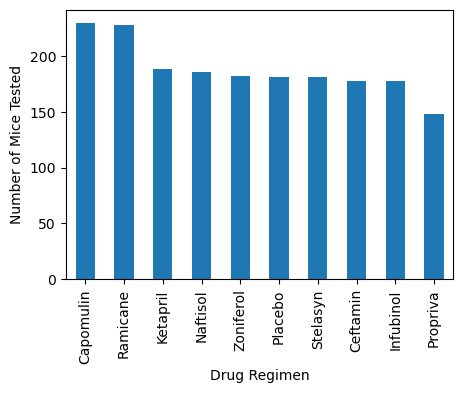

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
sum_df = clean_combine_df.groupby("Drug Regimen").count()
sum_df = sum_df.sort_values("Mouse ID", ascending=False)


sum_df.plot(y="Mouse ID", kind="bar", figsize=(5,3.5), xlabel="Drug Regimen",ylabel="Number of Mice Tested",legend=False)


Text(0, 0.5, 'Number of Mice Tested')

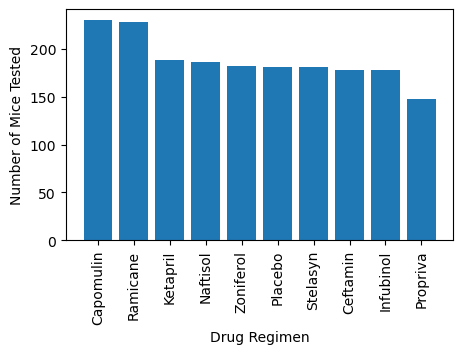

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#get a list of the drug regimen (sorted)
xnames = sum_df["Mouse ID"].index.tolist()

#replaces graph values with drug regimen names 
x_axis = np.arange(len(sum_df))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(5,3))
plt.bar(x_axis, sum_df["Mouse ID"], align="center")
plt.xticks(tick_locations, xnames, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")


<AxesSubplot:ylabel='Sex'>

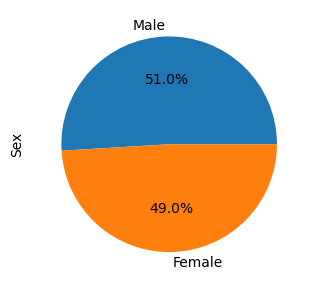

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df = clean_combine_df.groupby("Sex").count()
gender_df = gender_df.sort_values("Mouse ID", ascending=False)
gender_df

gender_df.plot.pie(y = "Mouse ID", figsize=(5,3.5),ylabel="Sex",legend=False,autopct="%1.1f%%")


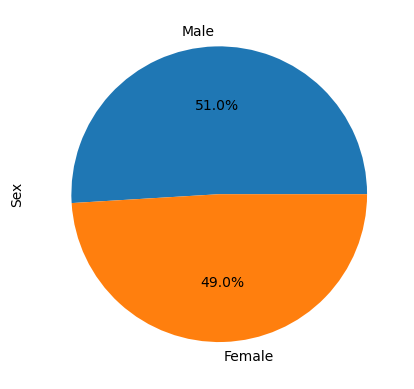

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
values = gender_df["Mouse ID"].tolist()
genders = gender_df["Mouse ID"].index.tolist()

plt.pie(values, labels=genders,autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

four_df = clean_combine_df.loc[(clean_combine_df["Drug Regimen"] == "Capomulin")| \
    (clean_combine_df["Drug Regimen"] == "Ramicane") | \
    (clean_combine_df["Drug Regimen"] == "Infubinol") | \
    (clean_combine_df["Drug Regimen"] == "Ceftamin") ]


four_clean_df = four_df.groupby("Mouse ID").last()
four_clean_df = four_clean_df.reset_index()
four_clean_df
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [73]:
# Put treatments into a list for for loop (and later for plot labels)
treatments= ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
capomulin_tumor_vol = []
ramicane_tumor_vol = []
infubinol_tumor_vol = []
ceftamin_tumor_vol = []

#loop to put all tumor valur in list
for ind in four_clean_df.index:
    if (four_clean_df["Drug Regimen"][ind] == "Capomulin"):
      capomulin_tumor_vol.append(four_clean_df["Tumor Volume (mm3)"][ind])
    elif (four_clean_df["Drug Regimen"][ind] == "Ramicane"):
      ramicane_tumor_vol.append(four_clean_df["Tumor Volume (mm3)"][ind])
    elif (four_clean_df["Drug Regimen"][ind] == "Infubinol"):
      infubinol_tumor_vol.append(four_clean_df["Tumor Volume (mm3)"][ind])
    elif (four_clean_df["Drug Regimen"][ind] == "Ceftamin"):
      ceftamin_tumor_vol.append(four_clean_df["Tumor Volume (mm3)"][ind])


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in treatments:
  test_df = four_clean_df[four_clean_df["Drug Regimen"] == x]
  quartiles = test_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
  lowerq = quartiles[0.25]
  upperq = quartiles[0.75]
  iqr = upperq-lowerq

  lower_bound = lowerq - (1.5*iqr)
  upper_bound = upperq + (1.5*iqr)

  #print(test_df["Tumor Volume (mm3)"].tolist() )
  outliers = [x for x in (test_df["Tumor Volume (mm3)"].tolist()) if (x <= lower_bound or x >= upper_bound)]
  print(f"{x}'s potential outliers:{outliers}")
  
    

Capomulin's potential outliers:[]
Ramicane's potential outliers:[]
Infubinol's potential outliers:[36.3213458]
Ceftamin's potential outliers:[]


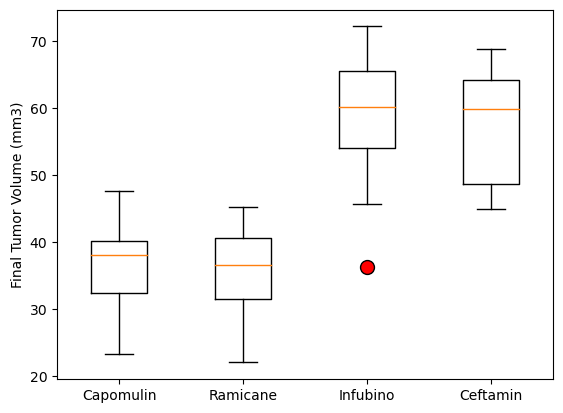

In [44]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
drugs_dict = {"Capomulin": [capomulin_tumor_vol], "Ramicane": [ramicane_tumor_vol],"Infubinol": [infubinol_tumor_vol],"Ceftamin": [ceftamin_tumor_vol]}

ax1=plt.subplot()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot([capomulin_tumor_vol,ramicane_tumor_vol,infubinol_tumor_vol,ceftamin_tumor_vol],labels = treatments, flierprops={"markerfacecolor":"red", "markersize":10})
plt.show()



## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

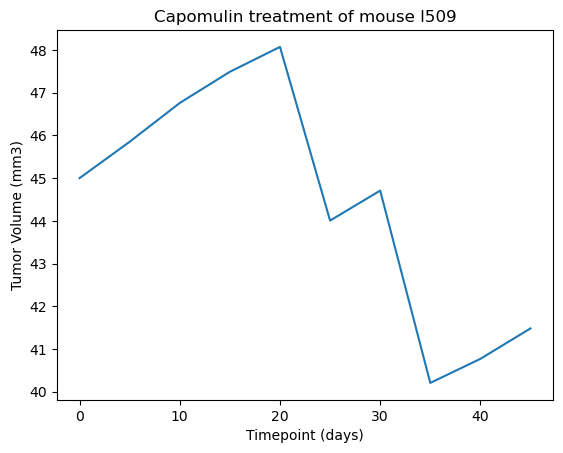

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin1_df = clean_combine_df.loc[(clean_combine_df["Drug Regimen"] == "Capomulin") & (clean_combine_df["Mouse ID"] == "l509")]
capomulin1_df
plt.plot(capomulin1_df["Timepoint"],capomulin1_df["Tumor Volume (mm3)"])
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")


Text(0, 0.5, 'Average Tumor Volume (mm3)')

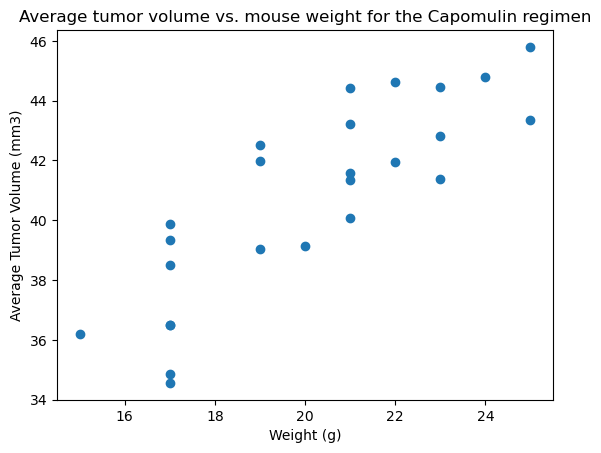

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_avg_df = clean_combine_df.loc[clean_combine_df["Drug Regimen"] == "Capomulin"]
capomulin_avg_df = capomulin_avg_df.groupby("Mouse ID").mean()
plt.scatter(capomulin_avg_df["Weight (g)"],capomulin_avg_df["Tumor Volume (mm3)"])
plt.title("Average tumor volume vs. mouse weight for the Capomulin regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

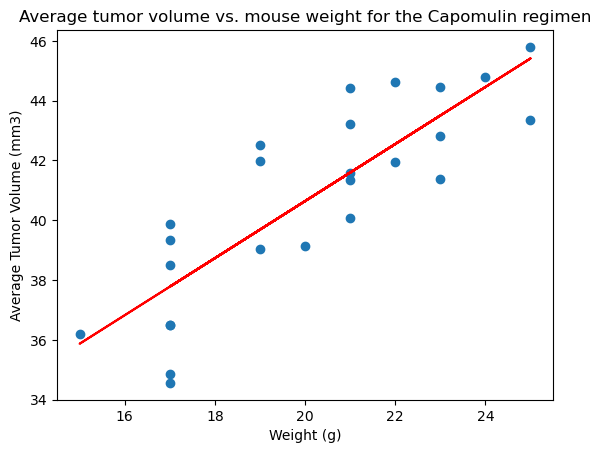

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_avg_df["Weight (g)"], capomulin_avg_df["Tumor Volume (mm3)"])
regress_values = capomulin_avg_df["Weight (g)"] * slope + intercept


plt.scatter(capomulin_avg_df["Weight (g)"],capomulin_avg_df["Tumor Volume (mm3)"])
plt.title("Average tumor volume vs. mouse weight for the Capomulin regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(capomulin_avg_df["Weight (g)"],regress_values,"r-")
